# Numerical Solution of Ordinary Differential Equations

It is very common that we need to solve differential equations in science and engineering. The broad class of "differential equations" comprises many types of initial value problems and boundary value problems, both of which might involve ordinary or partial differential equations.  Here, we will focus only on numerical solutions of initial value problems in the form of ordinary differential equations or systems of ordinary differential equations.

The general idea with an initial value problem is that we have information about the rate of change of a quantity of interest (i.e., we know the derivative of a function), we know the starting value of that quantity of interest, and we would like to, based only on information about starting value and the derivative, predict the quantity of interest at some future time, position, Temperature, or other independent variable that describes our system.

We'll do a very basic demonstration of how this works, but it is based on the idea that if you know the derivative, you can use the value of the deriviative to estimate how much your dependent variable (e.g., "y") will change over a small step in the independent variable (e.g., "x"). 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import scipy.optimize as opt
import pandas as pd
import time

## The Euler Method

The most basic approach is the Euler method, which is basically just an algebraic rearrangement of the classic definition of a slope (m) of a function:

$$m = \frac{dy}{dx} \approx \frac{\Delta y}{\Delta x}$$

Rearranging:

$$\Delta y = m\cdot \Delta x$$

Substituting discrete values of y and x in for the deltas:

$$y_1 - y_0 = \frac{dy}{dx} \cdot(x_1 - x_0)$$

We start at our initial value of (x0,y0); then, we take a small, numerical step in $x$, $\Delta x$ (let's call it $x_{step}$), and we update our value of the variable of interest, y, based on the derivative at $x_i$, which we assume is constant over the step h and thus extrapolate over the whole step:

$$y_1 = y_0 + \frac{dy}{dx} \cdot x_{step}$$

Generally, we'll write it as an iterative loop in terms of $x_i$ and $x_{i+1}$

$$y_{i+1} = y_i + \frac{dy}{dx} \cdot x_{step}$$

## Example 01: A first order ODE

Let's test this method on a first order ordinary differential equation:

$$\frac{dy}{dx} = -y \ \ \textrm{with} \ \ y(0) = 10$$

### Analytical Solution

We know that the analytical solution to this initial value problem is the following exponential function:

$$y(x) = 10 e^{-x}$$

Plot the solution to this IVP, y(x), over the domain x = [0, 6] in order to visualize how y changes as a function of x. Note, I called my function "ytrue(x)", and I evaluated it on a numpy array of x-values from 0 to 6 called "xtrue."  If you see those labels subsequently in this worksheet, it just means that I am using the analytical solution to this initial value problem, $y(x) = 10e^{-x}$

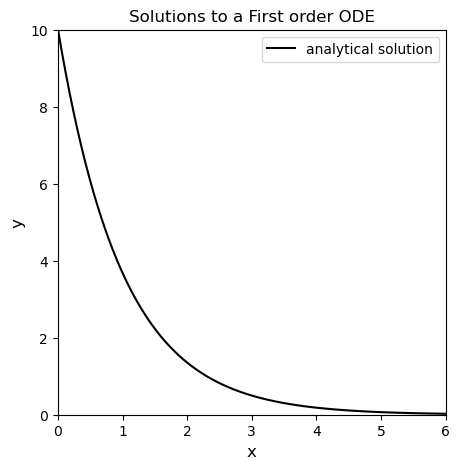

In [3]:
def ytrue(x):
    return 10*np.exp(-x)
xtrue = np.linspace(0, 6, 100)

## Plot solution
plt.figure(1, figsize = (5, 5))
plt.plot(xtrue, ytrue(xtrue), color = 'black', label = 'analytical solution')
plt.xlabel('x', fontsize = 12)
plt.ylabel('y', fontsize = 12)
plt.title('Solutions to a First order ODE')
plt.xlim(0, 6)
plt.ylim(0, 10)
plt.legend()
plt.show()

### An approximate solution with the Euler Method

Now, if we *didn't* know how to solve that equation, or if we could otherwise could not solve it analytically, we would need to use a numerical method. The Euler method is the most simple way to numerically solve a differential equation. We'll implement it to solve this example using a while loop.  I've also added in a bit of visualization to show how the Euler step works.

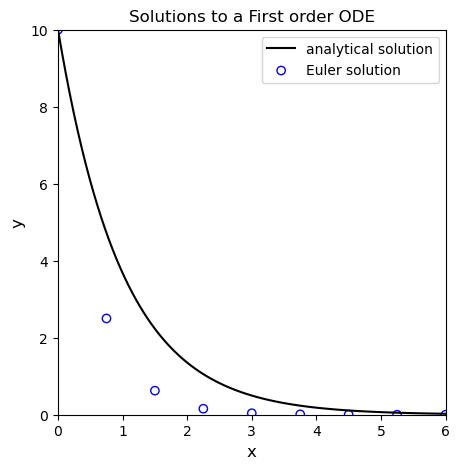

In [7]:
xstep = 0.75               #I get to choose the size of the step for the independent variable
x = 0                      #initial x
y = 10                     #initial y
xlist = [0]                #I'm going to store all x values in a list; initializing that list here
ylist = [10]               #Initialize a list containing y values for each x value

while xlist[-1] < 6:       #I want to continue iterating until I reach x = 6
    dydx = -y              #derivative of y with respect to x   
    y    =  y + xstep*dydx #update y value using an Euler step
    x    =  x + xstep      #update x value using step size
    xlist.append(x)        #append new value of x
    ylist.append(y)        #append new value of y
#     plt.plot(xtrue, ytrue(xtrue)) #plot true solution
#     for i in range(0, len(xlist)-1):
#         plt.plot([xlist[i], xlist[i+1]], [ylist[i], ylist[i+1]],':', color = 'k') #illustrate numerical steps in y
#     plt.show()             #show plot
#     time.sleep(2)          #pause for 2 seconds before next iteration

plt.figure(1, figsize = (5, 5))
plt.plot(xtrue, ytrue(xtrue), color = 'black', label = 'analytical solution')
plt.scatter(xlist, ylist, color = 'none', edgecolor = 'blue', label = 'Euler solution')      #plot full set of numerical estimates of y for values in xlist
plt.xlabel('x', fontsize = 12)
plt.ylabel('y', fontsize = 12)
plt.title('Solutions to a First order ODE')
plt.xlim(0, 6)
plt.ylim(0, 10)
plt.legend()
plt.show()


### A breakdown of the method

Generally speaking, this is how a numerical differential equation solver works. It calculates the slope(s) at the current values for all function arguments, it takes a step in independent variable, and it predicts the value of the function based on the slope. With the step size I chose above (xstep = 0.75), you can see that the Euler method does a very bad job of approximating the true solution. You can probably already see the reason for this:  the Euler Method calculates the value of the derivative at $x_i$, and then it tacitly assumes that this derivative value is constant over the entire step in x, but we know this isn't true here (nor for most differential equations that we need to use numerical methods for). You can improve the accuracy of the Euler Method by taking smaller steps; go ahead and experiment to figure out how small of a step you need to make before you are satisified that the numerical solution is roughly the same as the analytical solution.  Supress the looped plotting to keep it a bit more tidy.

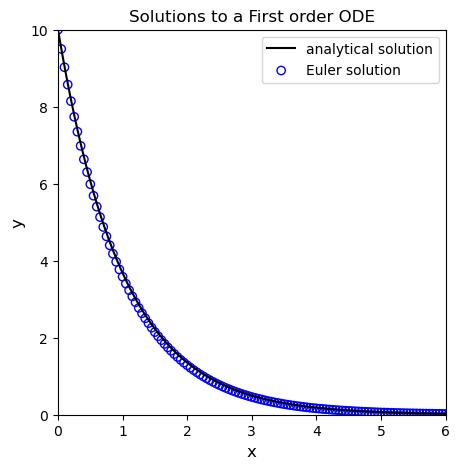

In [8]:
xstep = 0.05               #I get to choose the size of the step for the independent variable
x = 0                      #initial x
y = 10                     #initial y
xlist = [0]                #I'm going to store all x values in a list; initializing that list here
ylist = [10]               #Initialize a list containing y values for each x value

while xlist[-1] < 6:       #I want to continue iterating until I reach x = 6
    dydx = -y              #derivative of y with respect to x   
    y    =  y + xstep*dydx #update y value using an Euler step
    x    =  x + xstep      #update x value using step size
    xlist.append(x)        #append new value of x
    ylist.append(y)        #append new value of y
#     plt.plot(xtrue, ytrue(xtrue)) #plot true solution
#     for i in range(0, len(xlist)-1):
#         plt.plot([xlist[i], xlist[i+1]], [ylist[i], ylist[i+1]],':', color = 'k') #illustrate numerical steps in y
#     plt.show()             #show plot
#     time.sleep(2)          #pause for 2 seconds before next iteration

plt.figure(1, figsize = (5, 5))
plt.plot(xtrue, ytrue(xtrue), color = 'black', label = 'analytical solution')
plt.scatter(xlist, ylist, color = 'none', edgecolor = 'blue', label = 'Euler solution')      #plot full set of numerical estimates of y for values in xlist
plt.xlabel('x', fontsize = 12)
plt.ylabel('y', fontsize = 12)
plt.title('Solutions to a First order ODE')
plt.xlim(0, 6)
plt.ylim(0, 10)
plt.legend()
plt.show()


## Higher Order Methods (Runge-Kutta)

The Euler method is the simplest numerical method for solving differential equations, and it is generally limited because it needs such a small step size. There are far more sophisticated algoritms for numerical solution of differential equations, but they are all based on iterative steps in independent variable and updating the dependent variable at each step.  It would be worth your time to at least read up on Explicit Runge Kutta Methods - these are very commonly used for numerical solution of ODEs. Higher order Runge-Kutta methods are available, and they do a good job at forecasting how the deriviate will change over the $x_{step}$, and so they can approximate the true solution much more accurately and with much larger step sizes than an Euler method.

https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods

## `Scipy.integrate`

As usual, the methods in Python are more sophisticated than what we would usually write. They are flexible and powerful, and they can handle almost any type of differential equation you'd throw at them. Beyond writing your own loops to learn more about how the numerical method works, I would always defer to using the `scipy.integrate` package for numerical solution of ODEs.

### Function formatting for use with `scipy.integrate`

To perform a numerical solution of an ODE or system of ODEs in Python, we need to write a function. This will be a multivariate, vector function, very similar to what we did with `opt.root()`. It should be of the form `f(independent variable, dependent variable)`, where "dependent variable" is an array of all dependent or "state" variables in the ODE system, and it should return a vector of derivatives for each state variable with respect to the independent variable.

The basic rules:

1. The first argument to the function should be a scalar representing the ***independent*** variable that describes your system. As far as the ODE solver is concerned, it is always a scalar. Remember that these loops work iteratively, and at any given time, there is only a single value of the independent variable that you are considering. 
2.  The second argument to the function should be an array-like structure (array, tuple, list) that contains all of the dependent variables in the system of ODEs that you are solving. For a single ODE, that argument will be a scalar. 
3. The function should return the deriviative of each depedent variable with respect to the single independent variable in a vector-like structure (array, tuple, list). If it is a single ODE, simply return a scalar.

For the simple first order example above, this would be an appropriate way to format your function to pass to the ODE solver; you'll see that it adhere's to the rules above:

In [9]:
def D(x, y):        #function declaration - function should be of form f(independent variable, dependent variable)
    dydx = -y       #Calculate the value of the derivative of y at the current value of x
    return dydx     #return the value of the derivative of y at the current value of x

### Using Scipy's `solve_ivp()`

To solve this *initial value problem* numerically, we'll call solve_ivp from the scipy.integrate package. It's basic syntax is:

```python
solve_ivp(function name, span of independent variables to integrate over, initial values of dependent variables)
```

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp

It has a few particulars.  

1. The function must be of the form f(independent, dependent, \*args); it can have additional arguments, but you will need to pass them using the args keyword in the `solve_ivp()` options.
2. The span for the independent variable needs to be in the form of a 2-element array that contains the starting point and the ending point only. If you need to get a different set of (independent, dependent) value pairs out, we'll handle that later using the `t_eval` keyword argument using `solve_ivp` options. 
3. The initial value(s) for the dependent variables must be in a 1-D array like structure, even if you are only solving 1 ODE.
4. The function should return an array-like structure containing the derivatives of each dependent variable with respect to the independent variable

For this specific example, we are starting at y(0) = 10, and we are integrating from x = 0 to x = 6. Putting that into a format that works with `solve_ivp()`, we would say `y0 = [10]` and `xspan =(0, 6)`. We can then pass our function, integration span, and initial value for y to `solve_ivp()`, which will solve the differential equation numerically: `solve_ivp(D, xspan, y0)`.
    
Running this bit of code, you'll see that `solve_ivp()` returns a solution structure, similar to what we would get from `opt.root()` or `opt.minimize()`.  You can access any attribute from that structure using the dot operator.  Probably the most interesting parts are `.t`, which contains your independent variable values, and `.y`, which contains your dependent variable values. No matter the decisions you make about inputs, these are formatted as numpy arrays.

In [11]:
y0 = [10]
xspan =(0, 6)
solve_ivp(D, xspan, y0)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 50
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.100002  , 1.03168058, 1.90730319, 2.78642162,
       3.66539161, 4.5445371 , 5.4240714 , 6.        ])
 t_events: None
        y: array([[10.        ,  9.04835609,  3.56669733,  1.48659323,  0.61745564,
         0.25649777,  0.10653333,  0.04423023,  0.02486609]])
 y_events: None

Often, I save the output, which enables convenient post-analysis (plotting, etc.)  

[0.         0.100002   1.03168058 1.90730319 2.78642162 3.66539161
 4.5445371  5.4240714  6.        ]
[[10.          9.04835609  3.56669733  1.48659323  0.61745564  0.25649777
   0.10653333  0.04423023  0.02486609]]


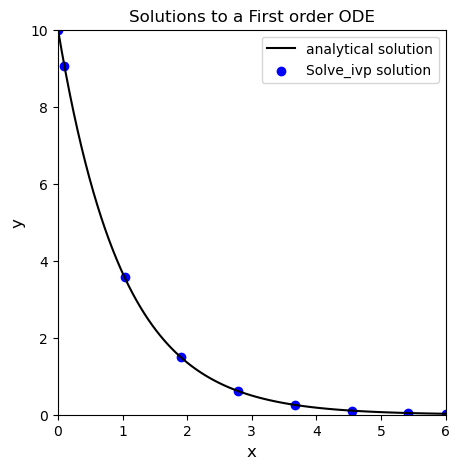

In [12]:
sol = solve_ivp(D, xspan, y0)  #numerical solution of ODE
print(sol.t)                   #print independent variable values, loosely called "t" in many solvers
print(sol.y)                   #print dependent variable values, loosely called "y" in many solvers

plt.figure(1, figsize = (5, 5))
plt.plot(xtrue, ytrue(xtrue), color = 'black', label = 'analytical solution')
plt.scatter(sol.t, sol.y, marker = 'o', color = 'blue', label = 'Solve_ivp solution') 
plt.xlabel('x', fontsize = 12)
plt.ylabel('y', fontsize = 12)
plt.title('Solutions to a First order ODE')
plt.xlim(0, 6)
plt.ylim(0, 10)
plt.legend()
plt.show()



### Step size in solvers

You may notice from the plot that the solver did not take even steps in x.  That is fine - some solvers use adaptive step sizes.  In general, they are far better at deciding on a good step size than we are.  This is why we only specify the starting and ending point for integration.  The solver decides on the intermediate points, not us.  That said, you may wish to get higher resolution and view the solution to the differential equation at additional points in the domain where you solved it.  You can do this in a few ways by adjusting options in `solve_ivp()`.

### Increasing Precision

Sometimes we don't care so much about specific time steps as we care about having closely space time steps; the easiest way to force more closely spaced time steps is to adjust the precision of our solution using the `atol` and `rtol` keyword arguments, which respectively set absolute and relative tolerances on the state variables.

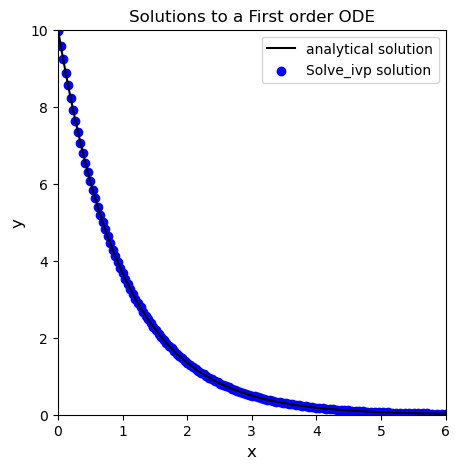

In [13]:
sol = solve_ivp(D, xspan, y0, atol = 1e-10, rtol = 1e-10)
plt.figure(1, figsize = (5, 5))
plt.plot(xtrue, ytrue(xtrue), color = 'black', label = 'analytical solution')
plt.scatter(sol.t, sol.y, marker = 'o', color = 'blue', label = 'Solve_ivp solution') 
plt.xlabel('x', fontsize = 12)
plt.ylabel('y', fontsize = 12)
plt.title('Solutions to a First order ODE')
plt.xlim(0, 6)
plt.ylim(0, 10)
plt.legend()
plt.show()

### Returning the solution at specific times

Alternatively, Let's say I wanted to plot the numerical solution on an evenly spaced set of x-values using a step size of 0.1.  I can do that using the `t_eval` keyword argument, which allows me to specify where I want to see the solution. You'll see that this returns the values at the specified x-values (even though it does not affect the steps taken by the ode solver).

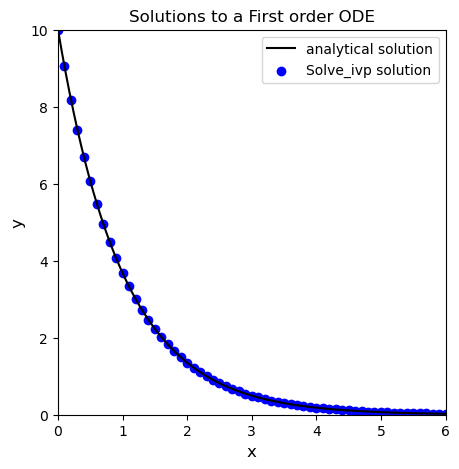

In [14]:
xgrid = np.linspace(0,6,61)
sol = solve_ivp(D, xspan, y0, t_eval = xgrid)
plt.figure(1, figsize = (5, 5))
plt.plot(xtrue, ytrue(xtrue), color = 'black', label = 'analytical solution')
plt.scatter(sol.t, sol.y, marker = 'o', color = 'blue', label = 'Solve_ivp solution') 
plt.xlabel('x', fontsize = 12)
plt.ylabel('y', fontsize = 12)
plt.title('Solutions to a First order ODE')
plt.xlim(0, 6)
plt.ylim(0, 10)
plt.legend()
plt.show()

### Returning a polynomial approximation for the ODE solution

It is important to recognize that these step-based ODE solvers will provide a discrete set of y-values for a discrete set of t-values; they are not a continuous function y(t).  Another nice feature of `solve_ivp()` is that you can get it to generate a continuous function for y(x). It does this by fitting an interpolating polynomial to the ODE solution.using interpolating polynomials. You do this with the `dense_output` keyword argument:

In [10]:
sol = solve_ivp(D, xspan, y0, dense_output = True)
print(sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 50
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x000001688C03E490>
   status: 0
  success: True
        t: array([0.        , 0.100002  , 1.03168058, 1.90730319, 2.78642162,
       3.66539161, 4.5445371 , 5.4240714 , 6.        ])
 t_events: None
        y: array([[10.        ,  9.04835609,  3.56669733,  1.48659323,  0.61745564,
         0.25649777,  0.10653333,  0.04423023,  0.02486609]])
 y_events: None


### Accessing the continuous approximation to the ODE solution

Once you print out the solution, you'll see it returns a sneaky attribute also called "sol," which makes my choice of "sol" as the name of the solution structure unfortunate.  In any event, just like sol.t or sol.y, you can call sol.sol

sol.sol is a *function* that returns the value of your dependent variable(s) for any value(s) of your independent variable.  This is a really great add on for a numerical ode solver as it saves you from having to create your own function using interpolating polynomials.  For example, let's say I wanted to know y at x = 3:

In [11]:
sol.sol(3)

array([0.49856278])

### You can pass arrays to the interpolating polynomial approximation

Let's say I wanted data at x = 1, 2.6, 3.175, and 4:

In [12]:
sol.sol([1, 2.6, 3.175, 4])

array([[3.68139827, 0.74365091, 0.41842251, 0.18346332]])

When might you use this?  Let's say you had a set of experimentally measured values of y for several values of x, and you want to regress parameters for your model...but you have to solve a differential equation in order to figure out your model prediction, and you have no control over the steps taken by the solver.  No problem - get it to output a continuous function, and you can then solve for the value of y at all of your experimental values of x and use it to generate an objective function.

### Options in `solve_ivp()`

The options available for solve_ivp are *extensive*.  We will not cover all of them for a few reasons.  First, we don't have the time and space to devote to this.  Second, generally speaking, the default options on things like function tolerance or maximum step sizes are pretty good.  Changing them requires a good understanding of how they work and why they are important.  Changing them haphazardly can be dangerous.  I would suggest researching the options available and putting serious thought into the ones that are relevant to your problem and *might* be worth changing.

The only other one that we'll mention is the method keyword.  Most of the time, the default method will be fine for you.  Sometimes, you will encounter *stiff* systems of differential equations. In high level terms, what that means is you have two or more coupled dependent variables that are changing as functions of the indepdendent variable. If those two variables change on extremely different scales, then you have what is called a stiff system, and they require specialized solvers.  When might you see this?  When the derivative of one variable is much, much larger than the derivative of the other variable.  In these cases, you will probably want to adjust your solver using the method keyword.  For example, the default solver in `solve_ivp()` is RK45, an explicit Runge–Kutta–Fehlberg method (4th order method, 5th order error estimate). It is not efficient for stiff systems, so you would want to change to Radau, BDF, or LSODA methods if you need to solve a stiff system:




In [15]:
solve_ivp(D, xspan, y0, method = 'Radau')
# solve_ivp(D, xspan, y0, method = 'BDF')
# solve_ivp(D, xspan, y0, method = 'LSODA')

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 92
     njev: 2
      nlu: 6
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.05623554, 0.61859092, 1.1809463 , 1.74330169,
       2.30565707, 2.86801245, 3.43036784, 3.99272322, 4.5550786 ,
       5.11743399, 5.67978937, 6.        ])
 t_events: None
        y: array([[10.        ,  9.45316451,  5.38705158,  3.06990582,  1.74943967,
         0.99694888,  0.5681288 ,  0.32375816,  0.18449927,  0.10514014,
         0.05991595,  0.03414416,  0.02478853]])
 y_events: None

How can you tell when you need to change solvers?  Usually the default option (RK45) is a good choice.  If you notice that it is taking a long time to run, making an unusually large number of steps, or failing to converge altogether, you probably are solving a stiff system.  Try one of the stiff ODE solvers instead.

## Example 02: Coupled Systems of ODES

We covered a lot of ground in terms of how to use the solvers above, but all of the examples we have considered so far deal with one ODE that we can easily solve by hand. Numerical ODE solvers really shine when you have a very complex differential equation that does not have an analytical solution, or when you have coupled systems of nonlinear differential equations, which are generally either very difficult or impossible to solve analytically. By "coupled" differential equations, I mean that the derivatives of the dependent variables are functions of each other (see system below). 

\begin{align*}
\frac{dx}{dt} &= -x^2 + y^2 \\
\frac{dy}{dt} &= -xy \\
x(0) &= 0 \\
y(0) &= 3 \\
\end{align*}

A typical question we might ask about this system is **what are the values of x and y at t = 10?**

I see that dx/dt is a function of x and y, and dy/dt is also a function of x and y.  I cannot solve one without solving the other. Though it is sometimes possible to solve a coupled system analytically, the vast majority of cases must be handled with numerical methods.  Fortunately, the framework we established above for solving a single differential equation is very general, and it is super easy to extend it to systems of differential equations. 

We just need to formulate our system of differential equations as multivariate vector functions of the form f(t,y) or, in other words, f(independent variable, dependent variable). Both of our dependent variables, (x and y in this case), need to be passed to the function in a single, vector-like structure. The function also needs to return dx/dt and dy/dt in a vector-like structure (tuple, array, list). For this example, the following is an acceptable way to define that function using lists:

In [17]:
def diffs(t,var):
    x, y = var
    dxdt = -x**2 + y**2
    dydt = -x*y
    return [dxdt, dydt]

Now that the function is defined, we can integrate it on the domain t = [0, 10].  We follow the same conventions as above.  The span of the independent variable must be a two-element array, and the initial values of x and y must be passed to the function as an array-like structure.

In [18]:
tspan = (0, 10)   #Integration span
x0    = 0
y0    = 3
var0  = [x0, y0]  #initial values for x and y, using a list
solve_ivp(diffs, tspan, var0) #use solve_ivp to solve the system of ODEs

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 86
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.11074086e-04, 1.22181495e-03, 1.23292236e-02,
       1.23403310e-01, 3.99129744e-01, 6.59872061e-01, 9.81345425e-01,
       1.41551383e+00, 2.11086260e+00, 3.16955301e+00, 4.57589552e+00,
       6.57176097e+00, 9.40329734e+00, 1.00000000e+01])
 t_events: None
        y: array([[0.00000000e+00, 9.99666704e-04, 1.09962361e-02, 1.10861897e-01,
        1.01750248e+00, 1.80599432e+00, 1.59400742e+00, 1.23278617e+00,
        8.98822884e-01, 6.08025858e-01, 3.99824278e-01, 2.71810873e-01,
        1.85510704e-01, 1.27199069e-01, 1.19221508e-01],
       [3.00000000e+00, 2.99999983e+00, 2.99997985e+00, 2.99794950e+00,
        2.80959204e+00, 1.81379423e+00, 1.15768239e+00, 7.36278525e-01,
        4.66328339e-01, 2.79797989e-01, 1.67043149e-01, 1.05503006e-01,
        6.76618444e-02, 4.39606722e-0

### The solution structure for Systems of ODEs

You can see the solution structure has a lot of useful information, exactly as in the case of a single ODE.  The only major difference here is that the `.y` values are now a larger array where the first row is values of x, and the second row is values of y at each time point in `.t`.  We can plot them as a function of t easily.  To illustrate the way things are stored, I'll extract x and y values from `sol.y`. I'll also request a much higher resolution in the output, taking 1000 steps between 0 and 10 for making a nice, smooth plot. I've also added labels and a legend so we can easily distinguish between the graphs.

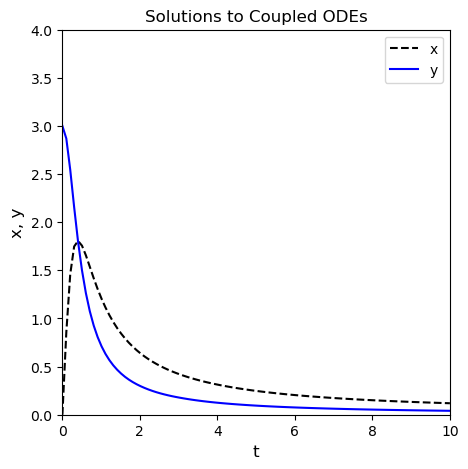

In [19]:
tgrid = np.linspace(0, 10, 100)
sol = solve_ivp(diffs, tspan, var0, t_eval = tgrid)
t   = sol.t
x   = sol.y[0,:]
y   = sol.y[1,:]

plt.figure(1, figsize = (5, 5))
plt.plot(t, x, linestyle = 'dashed', color = 'black', label = 'x')
plt.plot(t, y, color = 'blue', label = 'y')
plt.xlabel('t', fontsize = 12)
plt.ylabel('x, y', fontsize = 12)
plt.title('Solutions to Coupled ODEs')
plt.xlim(0, 10)
plt.ylim(0, 4)
plt.legend()
plt.show()

### Passing Extra Arguments with `solve_ivp()`

It may often be useful to you to pass extra parameters into your differential equation model.  The solver will only operate on the independent variable and dependent variable (i.e., the first two arguments).  You can add as many additional arguments as you like thereafter, and you pass them to solve_ivp using the usual args keyword.  So let's change that system just a bit to illustrate this concept:

\begin{align*}
\frac{dx}{dt} &= -ax^2 + by^2 \\
\frac{dy}{dt} &= -cxy \\
x(0) &= 0 \\
y(0) &= 3 \\
\end{align*}

Where a, b, and c are constant coefficients.  For the values (a,b,c) = (0.2, 1.3, 8), what are the values of x and y at t = 10?  What about for (a,b,c) = (1.5, 0.3, -0.1)?

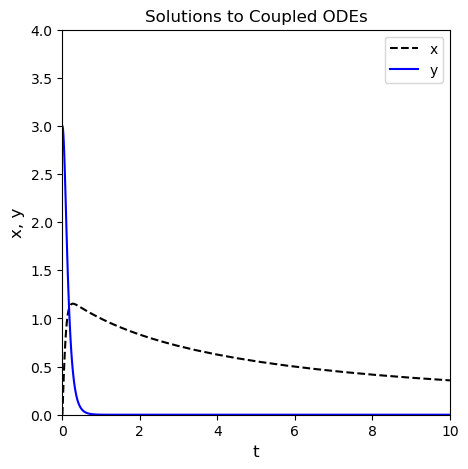

In [20]:
def diffs(t,var, a, b, c):
    x, y = var
    dxdt = -a*x**2 + b*y**2
    dydt = -c*x*y
    return [dxdt, dydt]

tspan = (0, 10)   #Integration span
x0    = 0
y0    = 3
var0  = [x0, y0]  #initial values for x and y
a     = 0.2
b     = 1.3
c     = 8

sol = solve_ivp(diffs, tspan, var0, args = (a, b, c), atol = 1e-8, rtol = 1e-8)
t   = sol.t
x   = sol.y[0,:]
y   = sol.y[1,:]

plt.figure(1, figsize = (5, 5))
plt.plot(t, x, linestyle = 'dashed', color = 'black', label = 'x')
plt.plot(t, y, color = 'blue', label = 'y')
plt.xlabel('t', fontsize = 12)
plt.ylabel('x, y', fontsize = 12)
plt.title('Solutions to Coupled ODEs')
plt.xlim(0, 10)
plt.ylim(0, 4)
plt.legend()
plt.show()